In [37]:
import sys
sys.path.append("../") # adding the path to read the utils file
import pandas as pd
from utils import *
import networkx as nx

pd.set_option('display.max_columns', None)

In [38]:
# you should run making_hikari2022_csv.ipynb before running this cell, since the two csv given with the paper have two differences
# to see what are the data types and the features of the dataset, you can take a look on the utils file
ds = pd.concat([
    pd.read_csv('../datasets/HIKARI-2021/ALLFLOWMETER_HIKARI2021.csv', dtype=dtype_hikari, usecols=selected_features_hikari),
    pd.read_csv('../datasets/HIKARI-2021/ALLFLOWMETER_HIKARI2022.csv', dtype=dtype_hikari, usecols=selected_features_hikari)], 
    ignore_index=True)
ds.head()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,2.207588,15,14,6,6,6.794746,6.341763,13.136509,0.933333,464,20,40,492,32,44,2,2,2,6,5,26,0,0,0,0,0,742,1826.0,121.733333,220.736581,0,1448,5025.0,358.928571,552.239840,0,1448,6851.0,236.241379,424.859275,18.119812,1.963762e+06,2.207603e+06,1.576859e+05,5.205052e+05,7.867813,2.032929e+06,2.177950e+06,1.675346e+05,5.606267e+05,7.867813,1.963762e+06,2.207603e+06,78842.963491,3.696378e+05,3103.387105,7.5,7.0,913.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.207603e+06,2.207603e+06,2.207603e+06,2.207603e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,True
1,15.624266,15,14,6,6,0.960045,0.896042,1.856087,0.933333,488,20,44,468,32,44,2,2,2,6,5,26,0,0,0,0,0,745,1829.0,121.933333,221.339257,0,1448,5025.0,358.928571,552.239840,0,1448,6854.0,236.344828,424.987166,20.980835,1.534300e+07,1.562428e+07,1.116020e+06,4.094889e+06,20.980835,1.541144e+07,1.559517e+07,1.199628e+06,4.270148e+06,10.013580,1.534300e+07,1.562428e+07,558009.896960,2.897622e+06,438.676603,7.5,7.0,914.5,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.883792e+04,2.524381e+05,2.812760e+05,1.406380e+05,158109.181742,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,True
2,12.203357,14,13,6,5,1.147225,1.065281,2.212506,0.928571,432,20,40,448,32,44,2,2,2,6,5,24,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,386.538462,817.479013,0,2896,6853.0,253.814815,592.570284,36.001205,1.196814e+07,1.220338e+07,9.387216e+05,3.314032e+06,15.020370,1.203674e+07,1.217482e+07,1.014569e+06,3.471107e+06,15.020370,1.196814e+07,1.220338e+07,469360.810060,2.345336e+06,561.566789,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.891302e+04,2.063251e+05,2.352381e+05,1.176190e+05,125449.251656,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,True
3,9.992448,14,13,6,5,1.401058,1.300983,2.702041,0.928571,432,20,40,436,32,44,2,2,2,6,5,24,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,386.538462,817.479013,0,2896,6853.0,253.814815,592.570284,50.067902,9.759205e+06,9.992470e+06,7.686515e+05,2.701448e+06,20.980835,9.828447e+06,9.963348e+06,8.302790e+05,2.833716e+06,20.980835,9.759205e+06,9.992470e+06,384325.770231,1.912152e+06,685.817940,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.952909e+04,2.037361e+05,2.332652e+05,1.166326e+05,123182.931318,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,True
4,7.780611,14,14,6,5,1.799345,1.799345,3.598689,1.000000,432,20,40,480,32,44,2,2,2,6,5,25,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,358.928571,792.173394,0,2896,6853.0,244.750000,583.468215,16.927719,7.545305e+06,7.780620e+06,5.985092e+

Bisogna controllare tutti gli interi ma anche i bulk_packets

In [39]:
ds.describe()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,7.835310e+05,783531.000000,783531.000000,7.835310e+05,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,783531.000000
mean,7.930232,15.141476,15.202140,6.076205,11.985713,3.475753e+03,2.813504e+03,6.284778e+03,1.975985,5.221322e+02,23.148409,28.325925,4.665602e+02,18.626142,22.381593,0.778524,1.156447,0.418391,5.386756,8.314095,28.377589,0.001020,0.000008,0.001668,0.000037,17.793925,193.943558,1.685628e+03,1.054549e+02,54.541936,22.216197,1167.560257,1.975559e+04,5.381859e+02,3.519654e+02,17.805741,1178.124581,2.144121e+04,4.416836e+02,2.990518e+02,8.931155e+05,5.733389e+06,8.904876e+06,1.332912e+06,1.162227e+06,2.537420e+04,4.618173e+06,6.764059e+06,4.246261e+05,1.293048e+06,8.930607e+05,6.085861e+06,1.011627e+07,1.260414e+06,8.197949e+05,8.433863e+04,10.925990,11.081897,1159.948376,1.210176e+04,9.029155e+01,4.742144e+03,0.043071,1.864668,6.219484e+03,4.148455e+06,8.041311e+05,1.059131e+06,1.148116e+06,8.946945e+05,1.179072e+05,4.571039e+06,5.764442e+06,8.678673e+06,5.109868e+06,6.037600e+05,25885.029520,26880.533083,7417.383553
std,97.220072,390.717612,395.026085,62.401492,393.515497,1.696581e+05,1.579508e+05,3.246767e+05,31.937681,1.484319e+04,12.629693,15.981276,1.259048e+04,12.781371,16.568396,0.999198,1.029890,0.812277,62.129340,145.891623,785.296047,0.032707,0.002767,0.048602,0.006490,32.828224,300.906381,6.378143e+04,3.639657e+03,351.378688,43.025812,2464.742493,3.385688e+05,1.639081e+04,2.860092e+03,32.883272,2464.226347,3.469619e+05,1.280389e+04,4.456432e+03,6.836720e+07,2.356495e+08,2.966493e+08,9.935204e+07,6.019453e+07,1.451423e+06,2.256559e+08,1.885185e+08,2.769771e+07,1.059583e+08,6.836746e+07,3.022425e+08,7.036060e+08,1.011819e+08,3.227715e+07,5.690312e+06,73.305702,80.394173,14522.031819,1.

We can notice that some of the int columns have a very low mean around 0, so I will take a look at the distribution of these columns.

In [40]:
ds.select_dtypes(include=['uint']).describe().T

,count,mean,std,min,25%,50%,75%,max
fwd_pkts_tot,783531.0,15.141476,390.717612,0.0,1.0,2.0,10.0,326292.0
bwd_pkts_tot,783531.0,15.202140,395.026085,0.0,1.0,2.0,11.0,326827.0
fwd_data_pkts_tot,783531.0,6.076205,62.401492,0.0,0.0,2.0,3.0,3953.0
bwd_data_pkts_tot,783531.0,11.985713,393.515497,0.0,0.0,2.0,6.0,326822.0
fwd_header_size_tot,783531.0,522.132230,14843.188543,0.0,16.0,40.0,328.0,12420104.0
bwd_header_size_tot,783531.0,466.560174,12590.482783,0.0,16.0,20.0,360.0,10458472.0
flow_FIN_flag_count,783531.0,0.778524,0.999198,0.0,0.0,0.0,2.0,140.0
flow_SYN_flag_count,783531.0,1.156447,1.029890,0.0,0.0,1.0,2.0,23.0
flow_RST_flag_count,783531.0,0.418391,0.812277,0.0,0.0,0.0,1.0,110.0
fwd_PSH_flag_count,783531.0,5.386756,62.129340,0.0,0.0,0.0,3.0,3953.0


Analysis of fwd_URG_flag_count

In [41]:
ds.fwd_URG_flag_count.value_counts()

fwd_URG_flag_count
0    782746
1       776
2         5
3         3
4         1
Name: count, dtype: int64

All the values above 0 aren't an attack, so seems like everything abouve 0 isn't an attack

In [42]:
ds[ds.fwd_URG_flag_count > 0].Label.value_counts()

Label
False    785
Name: count, dtype: int64

In [43]:
ds[ds.fwd_URG_flag_count == 0].Label.value_counts()

Label
False    731701
True      51045
Name: count, dtype: int64

Analysis of bwd_URG_flag_count

In [44]:
ds.bwd_URG_flag_count.value_counts()

bwd_URG_flag_count
0    783525
1         6
Name: count, dtype: int64

Same here, maybe it make sense to aggregate them into one column

In [45]:
ds[ds.bwd_URG_flag_count > 0].Label.value_counts()

Label
False    6
Name: count, dtype: int64

In [46]:
ds[ds.bwd_URG_flag_count == 0].Label.value_counts()

Label
False    732480
True      51045
Name: count, dtype: int64

Analysis of flow_CWR_flag_count

In [47]:
ds.flow_CWR_flag_count.value_counts()

flow_CWR_flag_count
0    782448
1       901
2       147
3        28
4         7
Name: count, dtype: int64

In [48]:
ds[ds.flow_CWR_flag_count > 0].Label.value_counts()

Label
False    1083
Name: count, dtype: int64

In [49]:
ds[ds.flow_CWR_flag_count == 0].Label.value_counts()

Label
False    731403
True      51045
Name: count, dtype: int64

Analysis of flow_ECE_flag_count

In [50]:
ds.flow_ECE_flag_count.value_counts()

flow_ECE_flag_count
0    783504
1        25
2         2
Name: count, dtype: int64

In [51]:
ds[ds.flow_ECE_flag_count > 0].Label.value_counts()

Label
False    27
Name: count, dtype: int64

In [52]:
ds[ds.flow_ECE_flag_count == 0].Label.value_counts()

Label
False    732459
True      51045
Name: count, dtype: int64

Analysis of flow_FIN_flag_count

In [53]:
ds.flow_FIN_flag_count.value_counts()

flow_FIN_flag_count
0      441289
2      253739
1       84158
3        2861
4         470
7         314
5         268
6         207
9         111
8          30
10         24
12         13
11          7
25          7
14          4
13          3
23          3
24          2
16          2
27          1
17          1
48          1
38          1
56          1
21          1
51          1
30          1
98          1
74          1
40          1
58          1
49          1
26          1
15          1
140         1
99          1
33          1
68          1
Name: count, dtype: int64

In [54]:
ds[ds.flow_FIN_flag_count > 0].Label.value_counts()

Label
False    302083
True      40159
Name: count, dtype: int64

In [55]:
ds[ds.flow_FIN_flag_count == 0].Label.value_counts()

Label
False    430403
True      10886
Name: count, dtype: int64

Analysis of flow_RST_flag_count

In [56]:
ds.flow_RST_flag_count.value_counts()

flow_RST_flag_count
0      540984
1      177804
2       49643
3       12620
4        1760
5         416
6         155
7          33
8          29
9          14
12          9
11          8
10          7
15          4
21          4
14          3
54          3
85          2
19          2
18          2
62          2
16          2
17          2
53          1
23          1
46          1
33          1
101         1
110         1
20          1
64          1
56          1
32          1
50          1
61          1
81          1
63          1
42          1
82          1
40          1
76          1
58          1
26          1
31          1
13          1
24          1
Name: count, dtype: int64

In [57]:
ds[ds.flow_FIN_flag_count > 0].Label.value_counts()

Label
False    302083
True      40159
Name: count, dtype: int64

In [58]:
ds[ds.flow_FIN_flag_count == 0].Label.value_counts()

Label
False    430403
True      10886
Name: count, dtype: int64

Analysis of flow_SYN_flag_count

In [59]:
ds.flow_SYN_flag_count.value_counts()

flow_SYN_flag_count
2     337294
0     286494
1     131732
3      20138
4       4884
7       2180
5        675
6         89
8         10
22         9
9          7
21         5
16         3
23         3
13         2
20         2
11         2
12         1
10         1
Name: count, dtype: int64

In [60]:
ds[ds.flow_SYN_flag_count > 0].Label.value_counts()

Label
False    456869
True      40168
Name: count, dtype: int64

In [61]:
ds[ds.flow_SYN_flag_count == 0].Label.value_counts()

Label
False    275617
True      10877
Name: count, dtype: int64

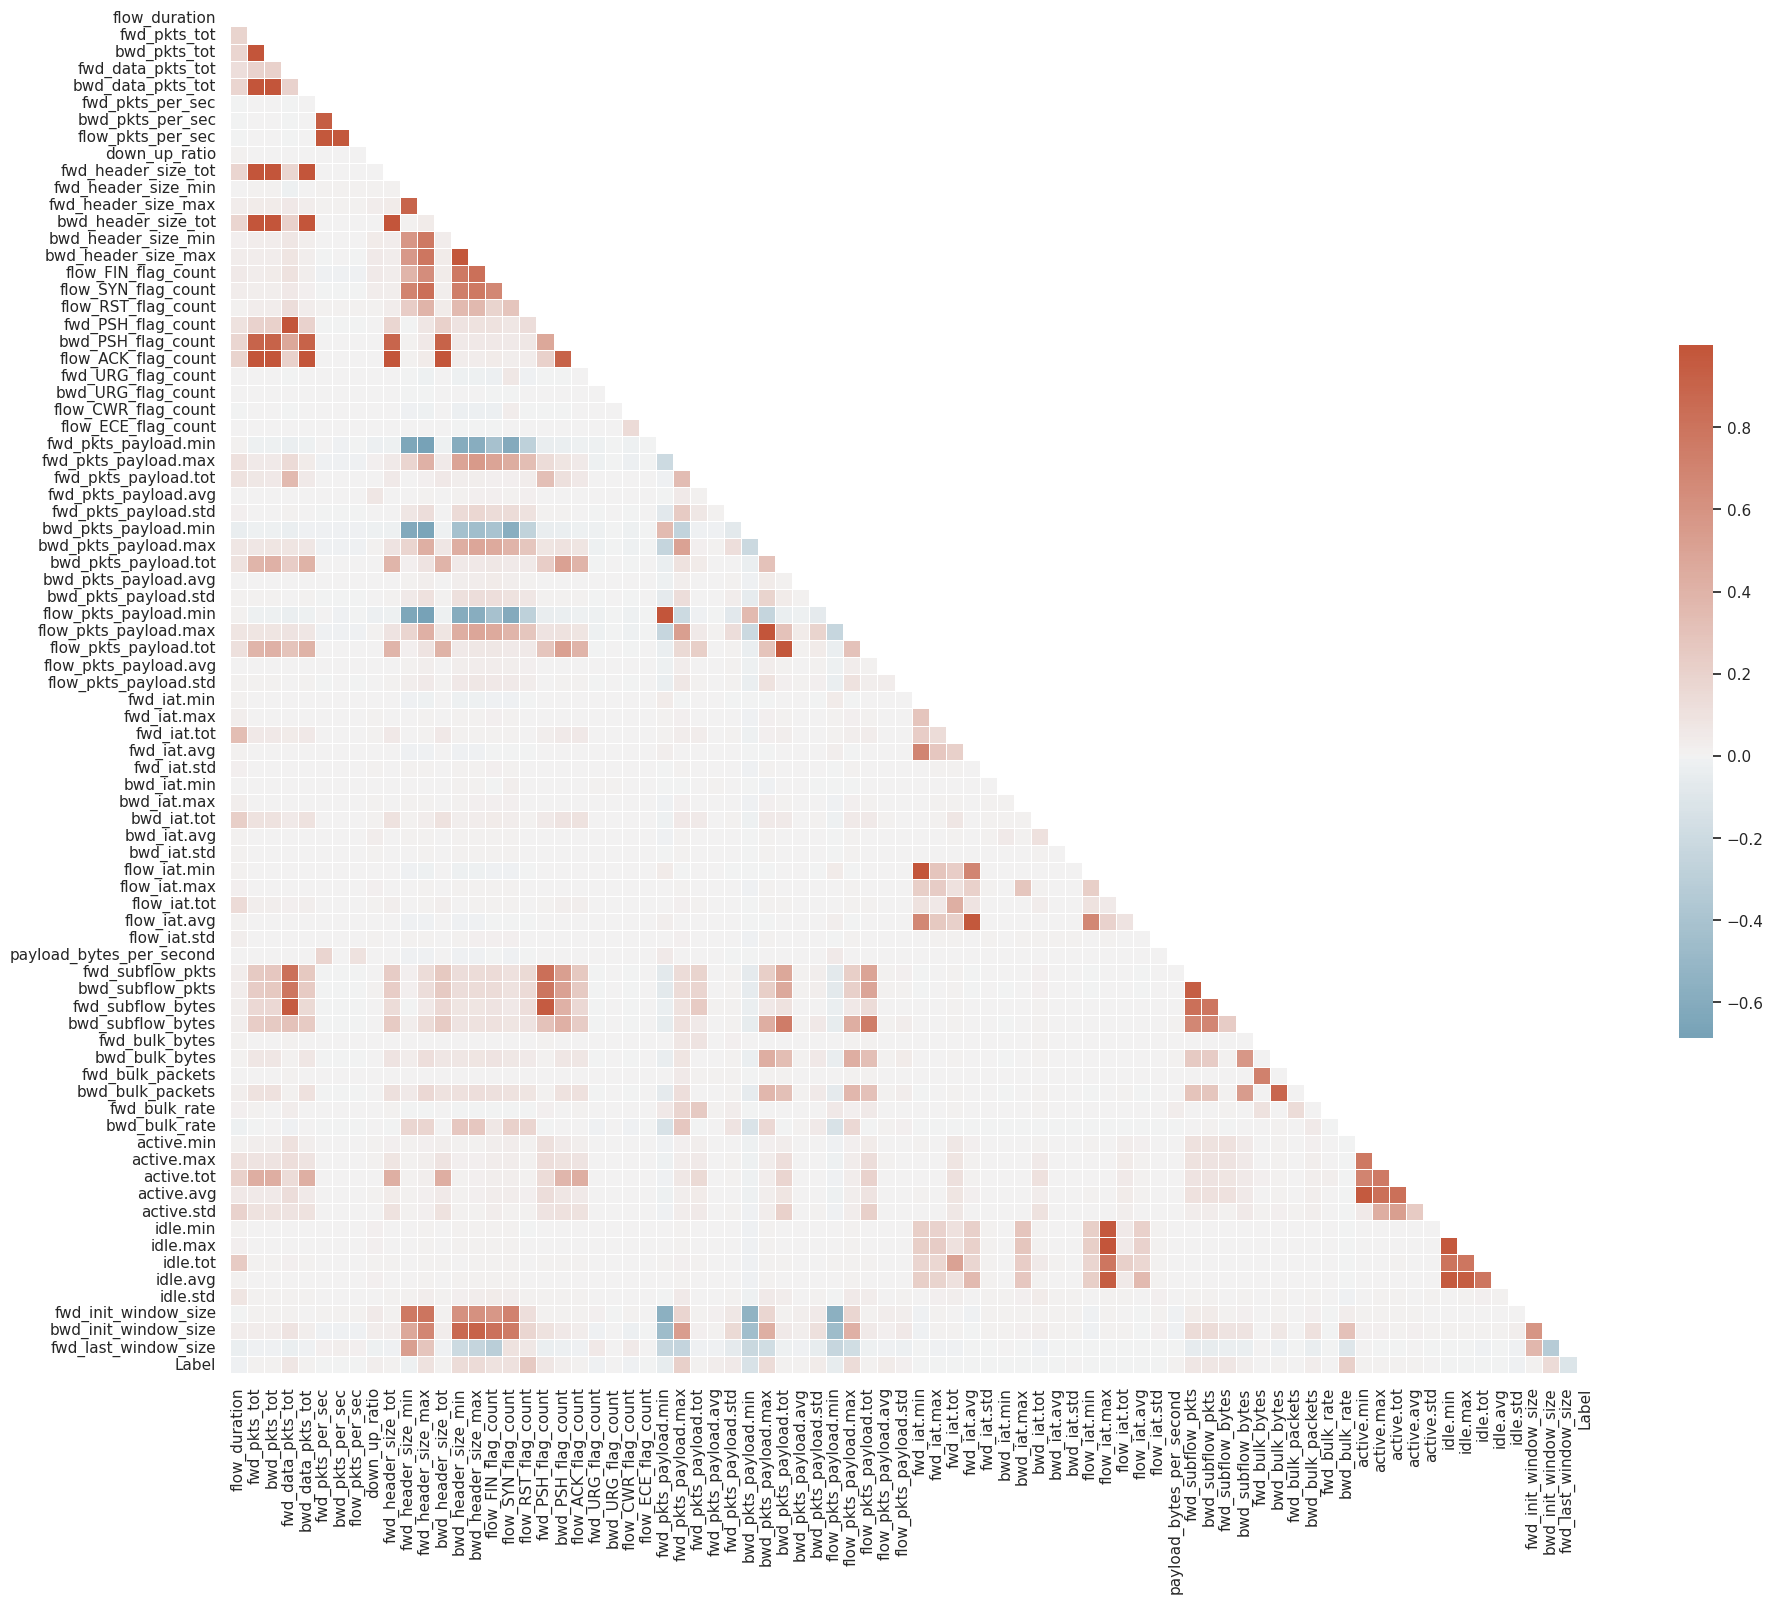

In [62]:
show_corr_matrix(ds)

In [63]:
correlation_matrix = ds.select_dtypes(include=['number','bool']).corr()

In [64]:
# Finding pairs with correlation greater than 0.9
correlation_threshold = 0.95
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            )
            correlation_pairs.append(pair)

print("Pairs with correlation over 95%:")
for pair in correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation over 95%:
fwd_pkts_tot - bwd_pkts_tot: 0.9977736565346315
fwd_pkts_tot - bwd_data_pkts_tot: 0.9981238640834618
fwd_pkts_tot - fwd_header_size_tot: 0.9983024676710928
fwd_pkts_tot - bwd_header_size_tot: 0.9969284507099473
fwd_pkts_tot - flow_ACK_flag_count: 0.9994240451360137
bwd_pkts_tot - bwd_data_pkts_tot: 0.9993969235398683
bwd_pkts_tot - fwd_header_size_tot: 0.9956196867430672
bwd_pkts_tot - bwd_header_size_tot: 0.999059175317736
bwd_pkts_tot - flow_ACK_flag_count: 0.9994481168048883
fwd_data_pkts_tot - fwd_PSH_flag_count: 0.996370720580026
fwd_data_pkts_tot - fwd_subflow_bytes: 0.9549801051400559
bwd_data_pkts_tot - fwd_header_size_tot: 0.9963652785942658
bwd_data_pkts_tot - bwd_header_size_tot: 0.998580945909404
bwd_data_pkts_tot - flow_ACK_flag_count: 0.9993157051503467
fwd_pkts_per_sec - flow_pkts_per_sec: 0.9745616615733033
bwd_pkts_per_sec - flow_pkts_per_sec: 0.9747202135752829
fwd_header_size_tot - bwd_header_size_tot: 0.9956178586071448
fwd_header_si

In [65]:
correlated_features = []
correlation_with_target = []
feature_name = []

for i in correlation_pairs:
    if i[0] not in correlated_features:
        correlated_features.append(i[0])
    if i[1] not in correlated_features:
        correlated_features.append(i[1])

for i in correlated_features:
    correlation_with_target.append(correlation_matrix['Label'][i])
    feature_name.append(i)

correlation_with_target = pd.DataFrame({'Feature': feature_name, 'Correlation': correlation_with_target})
print(correlation_with_target.shape)

(30, 2)


In [66]:
correlation_with_target["Correlation"] = correlation_with_target["Correlation"].abs()
correlation_with_target.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
13,bwd_header_size_max,0.149017
12,bwd_header_size_min,0.135375
17,flow_pkts_payload.max,0.131481
16,bwd_pkts_payload.max,0.131387
7,fwd_PSH_flag_count,0.073178
6,fwd_data_pkts_tot,0.072526
8,fwd_subflow_bytes,0.072494
15,flow_pkts_payload.min,0.053423
14,fwd_pkts_payload.min,0.053417
4,bwd_header_size_tot,0.015100


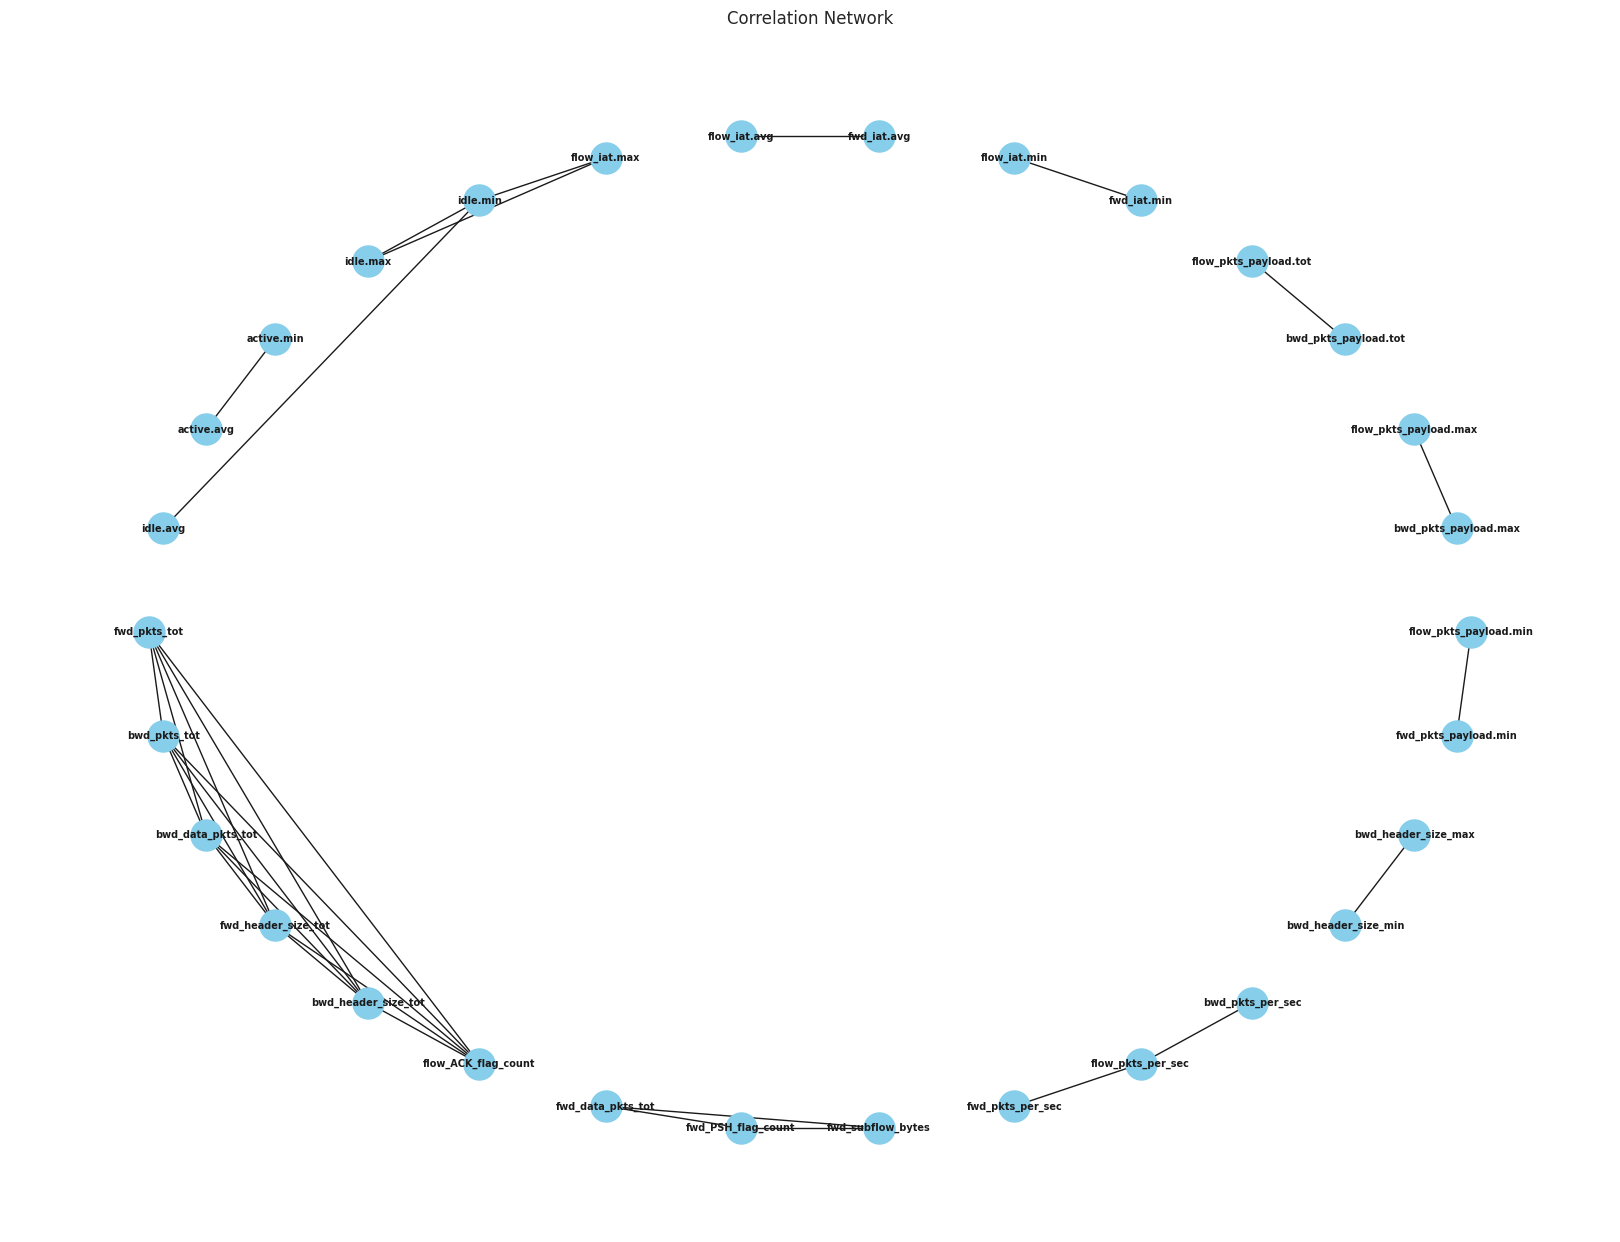

In [67]:
# Create a graph
G = nx.Graph()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Visualizing the graph
plt.figure(figsize=(16, 12))
pos = nx.shell_layout(G)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=7)
plt.title('Correlation Network')
plt.show()

In [77]:
target_feature = 'Label'

feature_to_remove = []

# Finding connected components (clusters of correlated features)
connected_components = list(nx.connected_components(G))

# Analyzing each cluster
for cluster in connected_components:
    cluster = list(cluster)
    print(f"Cluster: {cluster}")
    max_corr = -1
    max_corr_feature = None
    
    for feature in cluster:
        if feature != target_feature:
            correlation_with_target = correlation_matrix.loc[feature, target_feature]
            if abs(correlation_with_target) > max_corr:
                max_corr = abs(correlation_with_target)
                max_corr_feature = feature
    
    print(f"Highest correlated feature with '{target_feature}': {max_corr_feature} (Correlation: {max_corr})")
    cluster.remove(max_corr_feature)
    feature_to_remove.extend(cluster)


Cluster: ['fwd_header_size_tot', 'bwd_header_size_tot', 'bwd_data_pkts_tot', 'flow_ACK_flag_count', 'bwd_pkts_tot', 'fwd_pkts_tot']
Highest correlated feature with 'Label': bwd_header_size_tot (Correlation: 0.015099913865850363)
Cluster: ['fwd_subflow_bytes', 'fwd_PSH_flag_count', 'fwd_data_pkts_tot']
Highest correlated feature with 'Label': fwd_PSH_flag_count (Correlation: 0.07317797680269945)
Cluster: ['bwd_pkts_per_sec', 'flow_pkts_per_sec', 'fwd_pkts_per_sec']
Highest correlated feature with 'Label': bwd_pkts_per_sec (Correlation: 0.004660033545999704)
Cluster: ['bwd_header_size_max', 'bwd_header_size_min']
Highest correlated feature with 'Label': bwd_header_size_max (Correlation: 0.14901723133291697)
Cluster: ['flow_pkts_payload.min', 'fwd_pkts_payload.min']
Highest correlated feature with 'Label': flow_pkts_payload.min (Correlation: 0.05342264750972606)
Cluster: ['bwd_pkts_payload.max', 'flow_pkts_payload.max']
Highest correlated feature with 'Label': flow_pkts_payload.max (Corre

In [78]:
feature_to_remove

['fwd_header_size_tot',
 'bwd_data_pkts_tot',
 'flow_ACK_flag_count',
 'bwd_pkts_tot',
 'fwd_pkts_tot',
 'fwd_subflow_bytes',
 'fwd_data_pkts_tot',
 'flow_pkts_per_sec',
 'fwd_pkts_per_sec',
 'bwd_header_size_min',
 'fwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'flow_iat.min',
 'flow_iat.avg',
 'idle.avg',
 'flow_iat.max',
 'idle.min',
 'active.avg']